In [1]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)
#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
#NLP packages
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
import string
#importing libraries
import time #time module
import datetime
import nltk
nltk.download('punkt')
from tqdm import tqdm #progress bars 
from bs4 import BeautifulSoup #scrape data
from werkzeug import secure_filename #filename returned is an ASCII
import os #using operating system dependent functionality
import re #regular expressions
import gensim #unsupervised modeling and natural language processing
import string #contains a set of useful constants, such as ascii_letters and digits
import lxml
import bs4.builder._lxml
import lxml.etree

#Exploratory Data Analysis packages
import pandas as pd #data manipulation and analysis
import numpy as np #high-level mathematical functions
pd.options.display.max_colwidth=500 #sets the maximum number of rows and columns displayed

#backup package pickle
import pickle #it serializes objects so they can be saved to a file, and loaded in a program again later on
#visualization tools
import matplotlib.pyplot as plt #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area
import pylab as pl #PyPlot and NumPy

#richer representation
%matplotlib inline 
import matplotlib.font_manager as fm
from matplotlib import figure
import matplotlib.figure
from wordcloud import WordCloud, STOPWORDS #picture representation
#machine learning packages
#classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
import nltk #Natural Language Toolkit
nltk.download('words')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords #remove stopwords
from nltk.tokenize import word_tokenize #seperate words
from nltk.stem import WordNetLemmatizer #rocks : rock 
from nltk.corpus import wordnet #meanings of words, synonyms, antonyms, and more. Let's cover some examples
from nltk.stem.lancaster import LancasterStemmer #saying:say
#sklearn
from sklearn.preprocessing import LabelEncoder #Encode labels with value between 0 and n_classes-1
from sklearn.feature_extraction.text import TfidfVectorizer #tf and idf
from sklearn.metrics import confusion_matrix #precision recall
from sklearn.metrics import classification_report #displays the precision, recall, F1, and support scores
from sklearn.metrics import accuracy_score #accuracy
from sklearn import svm #Support Vector Machines (SVM)
from sklearn.multiclass import OneVsRestClassifier # For each classifier, the class is fitted against all the other classes.
from sklearn.model_selection import train_test_split #splitting training and testing 

[nltk_data] Downloading package punkt to
[nltk_data]     /home/aravindhan07/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/aravindhan07/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aravindhan07/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aravindhan07/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aravindhan07/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import os
import shutil 
os.popen("scrapy startproject amazon_reviews_scraping")
os.popen("scrapy genspider amazon_review https://www.amazon.in/eAirtec-inches-Ready-24DJ-Black/dp/B07MGQS2M8/ref=sr_1_1?keywords=tv&qid=1566743892&s=gateway&sr=8-1")
os.popen("scrapy runspider amazon_reviews_scraping/amazon_reviews_scraping/spiders/amazon_reviews.py -o reviews.csv")
os.popen("scrapy runspider amazon_reviews_scraping/amazon_reviews_scraping/spiders/amazon_reviews1.py -o reviews1.csv")
shutil.rmtree('/home/aravindhan07/streaming1/')  
os.mkdir("/home/aravindhan07/streaming1/") 

In [3]:
df1=pd.read_csv("/home/aravindhan07/reviews.csv",error_bad_lines=False,encoding='utf-8', delimiter=",")
df2=pd.read_csv("/home/aravindhan07/reviews1.csv",error_bad_lines=False,encoding='utf-8', delimiter=",")
df=pd.concat([df1,df2])
df=df.dropna()

In [4]:
#CLEANING TEXT

#''' ########################### Replacing shotcuts to full forms '''

def decontracted(phrase):
    # specific
    phrase =BeautifulSoup(phrase, 'lxml').get_text()
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#'''#######################   Lematization '''
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
lemmatizer = WordNetLemmatizer()

point=0
def cleanText(sentance):
    global point
    sentance=decontracted(sentance)
    word = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentance) if w.lower() not in stopwords.words('english') and w.isalpha()]
    #words=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in stopwords]
    #words = [stemmer.stem(word) for word in message.split() if word not in stopwords]
    #word =word.strip()
    point=point+1
    print('number of records read',point)
    return (word)

start_time = time.time()    
df['comment1']=df['comment'].apply(cleanText)
print("--- %s seconds ---" % (time.time() - start_time)) 


number of records read 1
number of records read 2
number of records read 3
number of records read 4
number of records read 5
number of records read 6
number of records read 7
number of records read 8
number of records read 9
number of records read 10
number of records read 11
number of records read 12
number of records read 13
number of records read 14
number of records read 15
number of records read 16
number of records read 17
number of records read 18
number of records read 19
number of records read 20
number of records read 21
number of records read 22
number of records read 23
number of records read 24
number of records read 25
number of records read 26
number of records read 27
number of records read 28
number of records read 29
number of records read 30
number of records read 31
number of records read 32
number of records read 33
number of records read 34
number of records read 35
number of records read 36
number of records read 37
number of records read 38
number of records rea

In [5]:
df.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          awesome product i am using right now and iphone no hanging  or lagging issues\n               
1  When you say its "Apple I Phone" it is the most coveted phones available in the market.Every time Apple release's a new phone there is a lot of buzz around the phone, but honestly speaking it stands up to all the hype and expectation created around it.Was earlier using I phone 6 now decided to upgrade my self to I Phone X, the delivery of ordered product was much faster then expected. Thanks Amazon- The minute you hold the phone in your hand it feels so Premium, the build quality is Excellen...   
2  iPhone X is like no other phone out there. Is a manifesto go-to phone for premiumness. Class apart in a nutshell.The security of iPhone is amazing as always.The camera is top notch and portrait mode is the best any camera offers.There are so many inbuilt AR apps which take the game to the outer space. The battery life is quite good as well. With heavy use it’s been able to last more than 12-14 hours.No heating issues.Supports siri and amazon alexa as well out of the box.Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online. Now its been almost 1 month that i am using this (thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust) and trust me its worth every penny. I got an authentic product with earphones, charger and a connector, you can check it as well on imei24 and official apple website. It feels so premium in hands and very handy as ...   
4                                                                   Found the perfect deal during the Great Indian Festival. I thought the deal was too good to be true and was expecting a cancellation of order from the seller. But the day I received the order was epic. The phone is simply superb. Everything about the phone is perfect....hey what do expect from an Apple product. Good battery life, durable with screen protector and case and screen quality is excellent. Thank you Amazon\n               

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, product, use, right, iphone, hang, lag, issue]  
1  [say, Apple, Phone, covet, phone, available, time, Apple, release, new, phone, lot, buzz, around, phone, honestly,

In [6]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in df['comment'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)
df['polarity']=polarity
df['subjectivity']=subjectivity

In [7]:
df1=df
df1['comment']=df1['comment'].str.replace('[{}]'.format(string.punctuation),' ')
df1 = df1.replace('\n',' ', regex=True)
for i in df1['comment1']:
    i.sort()

In [8]:
dfp=df1[df1.polarity>0]
dfn=df1[df1.polarity<0]
dfnn=df1[df1.polarity==0]

In [9]:
dfp.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                           awesome product i am using right now and iphone no hanging  or lagging issues                
1  When you say its  Apple I Phone  it is the most coveted phones available in the market Every time Apple release s a new phone there is a lot of buzz around the phone  but honestly speaking it stands up to all the hype and expectation created around it Was earlier using I phone 6 now decided to upgrade my self to I Phone X  the delivery of ordered product was much faster then expected  Thanks Amazon  The minute you hold the phone in your hand it feels so Premium  the build quality is Excellen...   
2  iPhone X is like no other phone out there  Is a manifesto go to phone for premiumness  Class apart in a nutshell The security of iPhone is amazing as always The camera is top notch and portrait mode is the best any camera offers There are so many inbuilt AR apps which take the game to the outer space  The battery life is quite good as well  With heavy use it’s been able to last more than 12 14 hours No heating issues Supports siri and amazon alexa as well out of the box Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online  Now its been almost 1 month that i am using this  thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust  and trust me its worth every penny  I got an authentic product with earphones  charger and a connector  you can check it as well on imei24 and official apple website  It feels so premium in hands and very handy as ...   
4                                                                    Found the perfect deal during the Great Indian Festival  I thought the deal was too good to be true and was expecting a cancellation of order from the seller  But the day I received the order was epic  The phone is simply superb  Everything about the phone is perfect    hey what do expect from an Apple product  Good battery life  durable with screen protector and case and screen quality is excellent  Thank you Amazon                

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, hang, iphone, issue, lag, product, right, use]   
1  [Apple, Apple, Apple, Back, Charging, Clarity, Crisp, Excellent, HD, Iphone, Jarring, Packaging, Phone, Phone, P

In [10]:
dfn.head()

comment  \
6                                                                                                                                                                                                     Got a defected piece   camera and face id was not working   phone is sent to bangalore service centre now   will receive it after 4 5 days   Not a happy experience till now                 
9                                                                                                   The phone screen and back panel is highly fragile for such an expensive phone  My phone back panel got broken within a month with a very low drop  The fun part is  the authorized service center says the back panel cannot be replaced and only option is to get a new phone                 
22      Purchase this product on December 27 but they delayed by 3 days    Because of that I was asked to do pick up from the Amazon warehouse   After using the product for 1 and half months   The battery life is really bad    I must say worst    the battery will drain within 5 hrs    And if you play like pubg mobile   the phone get heat  within 10 minutes of playing                  
34                                                                                                                                                                 I had a worst experience in purchasing Iphone X  Iphone never switched on after unboxing  After talking to amazon executive I had to submit phone to apple service centre  Amazon disnot even replaced my phone                 
36  I ordered new iPhone X grey on Amazon sale  Phone looks absolutely fine but battery is very weak though it has fast charging option my phone requires 4 5 hours to get charged completely n also my phone is very slow   feels like I have got a refurbished phone  Guys plz never go for online when u r purchasing costly phones  I have done a mistake u think before doing                 

                 stars                  titleheading  \
6   2.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
9   1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
22  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
34  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
36  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                           comment1  \
6                                                                                                                                                                                      [Got, bangalore, camera, centre, day, defect, experience, face, happy, id, phone, piece, receive, sent, service, till, work]   
9                                                                                             [authorize, back, back, back, broken, center, drop, expensive, fragile, fun, get, get, highly, low, month, new, option, panel, panel, panel, part, phone, phone, phone, phone, replace, say, screen, service, within]   
22                                                                         [Amazon, December, Purchase, ask, bad, bad, battery, battery, day, delayed, drain, get, half, heat, hr, life, like, minute, mobile, month, must, phone, pick, play, product, product, pubg, really, say, use, warehouse, within, within]   
34                                                                                                                                        [Amazon, Iphone, Iphone, amazon, apple, bad, centre, disnot, even, executive, experience, never, phone, phone, purchasing, replace, service, submit, switch, talk, unbox]   
36  [Amazon, Guys, Phone, X, absolutely, also, battery, charge, charge, completely, costly, do, fast, feel, fine, get, get, go, grey, hour, iPhone, like, lo

In [11]:
dfnn.head()

comment  \
60                                                                                                                                       Ear phone got off can talk only through speaker                
61                                                                                                             Touch not working properly  Apple care says talk to amazon  No resolution                
66                                                 When I unboxed it I saw photo gallery n there were some pics already taken one year ago  means phone was already unboxed one year ago                
87                                                                                                                                                                            Got at 68k                
105  ConsCall recording option is absent hangs at times Sharing provisions are less ProsCamera is awesomeOverall purchase is good This is my personal experience after usage of a month                 

                  stars                  titleheading  \
60   1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
61   1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
66   3.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
87   5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
105  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                             comment1  \
60                                                                                                   [Ear, get, phone, speaker, talk]   
61                                                                [Apple, Touch, amazon, care, properly, resolution, say, talk, work]   
66                          [ago, already, already, gallery, n, one, one, phone, photo, pic, saw, take, unboxed, unboxed, year, year]   
87                                                                                                                              [Got]   
105  [ConsCall, Sharing, absent, awesomeOverall, experience, hang, month, option, personal, provision, purchase, record, time, usage]   

     polarity  subjectivity  
60        0.0           1.0  
61        0.0           0.1  
66        0.0           0.0  
87        0.0           0.0  
105       0.0           0.3

In [17]:
print('positive:',len(dfp),'\nNegative:',len(dfn),'\nNeutral: ',len(dfnn))
df['titleheading'].unique()

positive: 1935 
Negative: 232 
Neutral:  233


array(['Apple-iPhone-64GB-Space-Grey', 'Echo-Dot-3rd-Gen-improved'],
      dtype=object)

In [20]:
import os
import shutil 
shutil.rmtree('/home/aravindhan07/streaming1/')  
os.mkdir("/home/aravindhan07/streaming1/") 

In [16]:
import pandas as pd
import time
import csv
filename = 1
for i in range(len(dfp)):
     if i % 100 == 0:
         time.sleep(5)
         dfp.iloc[i:i+100].to_csv('/home/aravindhan07/streaming1/'+str(filename)+'.csv',encoding='utf-8',sep='\t', index=False,line_terminator='\n', float_format='%.2f')
         filename += 1

In [19]:
import pandas as pd
import time
import csv
filename = 1
for i in range(len(dfn)):
     if i % 100 == 0:
         time.sleep(5)
         dfn.iloc[i:i+100].to_csv('/home/aravindhan07/streaming1/'+str(filename)+'.csv',encoding='utf-8',sep='\t', index=False,line_terminator='\n', float_format='%.2f')
         filename += 1

In [21]:
import pandas as pd
import time
import csv
filename = 1
for i in range(len(dfnn)):
     if i % 100 == 0:
         time.sleep(5)
         dfnn.iloc[i:i+100].to_csv('/home/aravindhan07/streaming1/'+str(filename)+'.csv',sep='\t',encoding='utf-8', index=False,line_terminator='\n', float_format='%.2f')
         filename += 1

In [137]:
df.head()

comment  \
0  An incredible technology interface brought by Amazon  It s still our first week and I must say its has become an interface for me to enjoy the music across era s   create my own playlists  for my young kids to listen to stories and learning and improving general   world knowledge and learning different languages  for my mother to enjoy spiritual music while my better half getting amused how a kid of 4 years to elders in family all enjoy such a technology marvel all at the same time  Experien...   
1  It’s jus beyond awesome 👌🏻😍😍😍 I thought dot is bit small so the sound quality may affect due to size but really it’s really a beast  The sound system is jus beyond my expectations in one room the sound to the full volume is very loud Pros  I have syska led smart bulb too which works wonder wid this amazon dot It’s also works with fire tv stick Sound quality is jus fab Look wise it’s beautifulCan be commanded being in different room Cons Cannot take multiple instructions especially when u r o...   
2  Verdict While the previous Echo Dots were cheap ways to extend smart home control all over your home  they weren t the most attractive devices and had weedy sounds  Bought it on tha second day of Prime day in a combo The Amazon Echo Dot  3rd Gen  as a vast improvement on the originals  even though it costs exactly the same  The new finish looks fantastic and the new Echo Dot is a device that you d happily put out on show  Audio has been dramatically improved  too  both in terms of quality an...   
3                            Its really made the new device compared to the old model  less compatible  It has changed the power port from Standard most common microUSB to a very non standard one  Which means  portability from one spot in the room to another or taking it to another room has been majorly compromised  Even worse  the power cable is attached permanently  not via a USB socketM guessing because its a 15W charger  its probably to force users to use the provided charger only                
4  All new ECHO DOT THIRD GEN looks compact but the sound quality is amazing for its size  After using it for nearly two weeks the following are it s pros and cons PROS 1    Compact and relatively easy to setup Check out the YouTube videos in case of doubt or look up Product HELP 2   Once the product is synchronised with the Alexa app  on your mobile  it retains its memory even if the power fails  though it has no battery back up  Alexa on the cloud retains it s memory    3   Amazing sound qual...   

                stars               titleheading  \
0  5.0 out of 5 stars  Echo-Dot-3rd-Gen-improved   
1  5.0 out of 5 stars  Echo-Dot-3rd-Gen-improved   
2  4.0 out of 5 stars  Echo-Dot-3rd-Gen-improved   
3  3.0 out of 5 stars  Echo-Dot-3rd-Gen-improved   
4  3.0 out of 5 stars  Echo-Dot-3rd-Gen-improved   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                      [Amazon, Experience, across, amuse, become, brought, create, different, elder, enjoy, enjoy, enjoy, enjoy, era, everyday, explore, family, first, general, get, half, improve, incredible, interface, interface, kid, kid, knowledge, language, learn, learn, listen, marvel, mother, music, music, must, playlist, say, spiritual, still, story, technology, technology, time, week, well, world, year, young]   
1                                                                      [affect, also, amazon, amazon, beast, beautifulCan, beyond, be

In [22]:
def Rate_Convertion(x):
    int(x)
    if (x>0):
        x='Positive'
        return x
    elif x==0:
        x='Neutral'
        return x
    elif x<0:
        x='Negative'
        return x
df['Rating']=df['polarity'].apply(lambda x: Rate_Convertion(x))
df.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          awesome product i am using right now and iphone no hanging  or lagging issues\n               
1  When you say its  Apple I Phone  it is the most coveted phones available in the market Every time Apple release s a new phone there is a lot of buzz around the phone  but honestly speaking it stands up to all the hype and expectation created around it Was earlier using I phone 6 now decided to upgrade my self to I Phone X  the delivery of ordered product was much faster then expected  Thanks Amazon  The minute you hold the phone in your hand it feels so Premium  the build quality is Excellen...   
2  iPhone X is like no other phone out there  Is a manifesto go to phone for premiumness  Class apart in a nutshell The security of iPhone is amazing as always The camera is top notch and portrait mode is the best any camera offers There are so many inbuilt AR apps which take the game to the outer space  The battery life is quite good as well  With heavy use it’s been able to last more than 12 14 hours No heating issues Supports siri and amazon alexa as well out of the box Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online  Now its been almost 1 month that i am using this  thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust  and trust me its worth every penny  I got an authentic product with earphones  charger and a connector  you can check it as well on imei24 and official apple website  It feels so premium in hands and very handy as ...   
4                                                                   Found the perfect deal during the Great Indian Festival  I thought the deal was too good to be true and was expecting a cancellation of order from the seller  But the day I received the order was epic  The phone is simply superb  Everything about the phone is perfect    hey what do expect from an Apple product  Good battery life  durable with screen protector and case and screen quality is excellent  Thank you Amazon\n               

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, hang, iphone, issue, lag, product, right, use]   
1  [Apple, Apple, Apple, Back, Charging, Clarity, Crisp, Excellent, HD, Iphone, Jarring, Packaging, Phone, Phone, P

In [23]:
#converting word to vec
start_time = time.time()    
w2v_model=gensim.models.Word2Vec(df['comment1'].values,min_count=5,size=400, workers=4)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.0605506896972656 seconds ---


In [24]:
len(list(w2v_model.wv.vocab)) #unique words

1242

In [25]:
w2v_words = list(w2v_model.wv.vocab)

len(w2v_words)


sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(df['comment1'].values): # for each review/sentence
    sent_vec = np.zeros(400) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))


    

word2vec_features=pd.DataFrame(sent_vectors) 

100%|██████████| 2400/2400 [00:03<00:00, 635.10it/s] 


2400
400


In [26]:
word2vec_features.head()

0         1         2         3         4         5         6    \
0 -0.002298 -0.078812 -0.084675  0.134255  0.217346 -0.176115  0.220060   
1 -0.001761 -0.069947 -0.074905  0.117893  0.192967 -0.155610  0.194277   
2  0.000094 -0.072952 -0.079245  0.124399  0.205607 -0.164428  0.205945   
3 -0.001285 -0.071108 -0.076296  0.119811  0.196088 -0.158092  0.196688   
4 -0.001516 -0.078227 -0.084472  0.131084  0.216894 -0.173015  0.215783   

        7         8         9    ...       390       391       392       393  \
0 -0.279108 -0.055150  0.117889  ...  0.057973  0.107469 -0.196656  0.188329   
1 -0.246568 -0.047620  0.102901  ...  0.049932  0.093133 -0.172281  0.165348   
2 -0.260530 -0.049220  0.106899  ...  0.051735  0.098079 -0.181620  0.174901   
3 -0.250239 -0.047901  0.104121  ...  0.050630  0.094927 -0.175500  0.168257   
4 -0.275067 -0.051281  0.113629  ...  0.053573  0.103042 -0.191569  0.183135   

        394       395       396       397       398       399  
0  0.067533 -0.035585 -0.019086  0.235079  0.102058  0.102411  
1  0.060668 -0.030701 -0.016835  0.207314  0.089238  0.089803  
2  0.064638 -0.033491 -0.018212  0.218050  0.093223  0.093560  
3  0.061641 -0.031502 -0.017142  0.210393  0.090097  0.091378  
4  0.068185 -0.033160 -0.018608  0.230809  0.098521  0.099415  

[5 rows x 400 columns]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(word2vec_features, df['Rating'], stratify = df['Rating'], test_size = 0.2)     

In [28]:
start_time = time.time()
print(start_time)
classifier = OneVsRestClassifier(svm.SVC(C=500, probability=True, class_weight='balanced',cache_size=500, kernel='linear',verbose=True),n_jobs=-50)
classifier.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
with open('train_svm_model','wb' ) as svm:
    pickle.dump(classifier,svm)

1567654412.209837
[LibSVM][LibSVM][LibSVM]--- 125.49258041381836 seconds ---


In [33]:
with open('train_svm_model','rb' ) as svm:
    classifier =pickle.load(svm)

In [34]:
y_predict_svm=classifier.predict(X_test)

In [35]:
start_time = time.time()
y_predict_svm=classifier.predict(X_test)
svm_con=confusion_matrix(y_test,y_predict_svm)
print(svm_con)
svm_cr=classification_report(y_test,y_predict_svm)
print(svm_cr)
print("--- %s seconds ---" % (time.time() - start_time))


[[ 25   9  12]
 [ 14  29   4]
 [ 90  65 232]]
              precision    recall  f1-score   support

    Negative       0.19      0.54      0.29        46
     Neutral       0.28      0.62      0.39        47
    Positive       0.94      0.60      0.73       387

    accuracy                           0.60       480
   macro avg       0.47      0.59      0.47       480
weighted avg       0.80      0.60      0.65       480

--- 2.5301783084869385 seconds ---


In [36]:
accuracy_svm = accuracy_score(y_test,y_predict_svm)
accuracy_svm

0.5958333333333333

In [37]:
# training a KNN classifier 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train) 
  
# accuracy on X_test 

# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  


accuracy = knn.score(X_test, y_test) 
print (accuracy )
  
cm = confusion_matrix(y_test, knn_predictions) 

0.7958333333333333


In [38]:
cm

array([[  2,   1,  43],
       [  1,  12,  34],
       [ 12,   7, 368]])

In [39]:
# training a Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

(y_train.values)

0.2625


array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [40]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6

plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


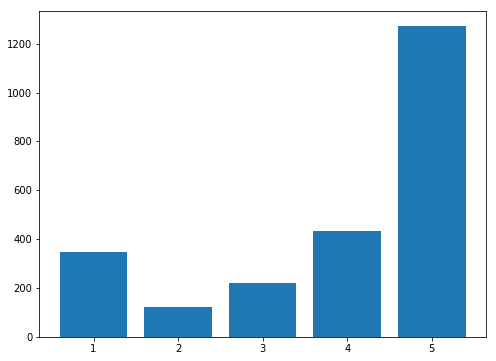

In [196]:
import re
def reg(i):
    matchObj = re.match( r'.', i)
    i=matchObj.group()
    i=int(i)
    return i
df_viz=df
df_viz['stars']=df_viz['stars'].apply(reg)
summarised_results = df["stars"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.autoscale() 
plt.show()

In [42]:
def Rate_Convertion(x):
    int(x)
    if (x>0):
        x='Positive'
        return x
    elif x==0:
        x='Neutral'
        return x
    elif x<0:
        x='Negative'
        return x
df['Rating']=df['polarity'].apply(lambda x: Rate_Convertion(x))
df.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          awesome product i am using right now and iphone no hanging  or lagging issues\n               
1  When you say its  Apple I Phone  it is the most coveted phones available in the market Every time Apple release s a new phone there is a lot of buzz around the phone  but honestly speaking it stands up to all the hype and expectation created around it Was earlier using I phone 6 now decided to upgrade my self to I Phone X  the delivery of ordered product was much faster then expected  Thanks Amazon  The minute you hold the phone in your hand it feels so Premium  the build quality is Excellen...   
2  iPhone X is like no other phone out there  Is a manifesto go to phone for premiumness  Class apart in a nutshell The security of iPhone is amazing as always The camera is top notch and portrait mode is the best any camera offers There are so many inbuilt AR apps which take the game to the outer space  The battery life is quite good as well  With heavy use it’s been able to last more than 12 14 hours No heating issues Supports siri and amazon alexa as well out of the box Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online  Now its been almost 1 month that i am using this  thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust  and trust me its worth every penny  I got an authentic product with earphones  charger and a connector  you can check it as well on imei24 and official apple website  It feels so premium in hands and very handy as ...   
4                                                                   Found the perfect deal during the Great Indian Festival  I thought the deal was too good to be true and was expecting a cancellation of order from the seller  But the day I received the order was epic  The phone is simply superb  Everything about the phone is perfect    hey what do expect from an Apple product  Good battery life  durable with screen protector and case and screen quality is excellent  Thank you Amazon\n               

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, hang, iphone, issue, lag, product, right, use]   
1  [Apple, Apple, Apple, Back, Charging, Clarity, Crisp, Excellent, HD, Iphone, Jarring, Packaging, Phone, Phone, P

In [43]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6

plt.rcParams["figure.figsize"] = plot_size

8.0
6.0


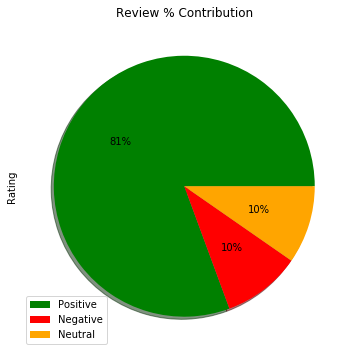

In [44]:
labels = ['Positive', 'Negative','Neutral']
df.Rating.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red", "orange"],
                                  counterclock=True, shadow=True,labels = None)
#plt.pie(autopct='%1.1f%%')
plt.title('Review % Contribution')
plt.legend(labels=labels,loc=3)

In [45]:
df['liststring'] = df['comment1'].agg(lambda x: ','.join(map(str, x)))

In [46]:
df_positive = df[df['Rating'] == 'Positive']
df_positive.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          awesome product i am using right now and iphone no hanging  or lagging issues\n               
1  When you say its  Apple I Phone  it is the most coveted phones available in the market Every time Apple release s a new phone there is a lot of buzz around the phone  but honestly speaking it stands up to all the hype and expectation created around it Was earlier using I phone 6 now decided to upgrade my self to I Phone X  the delivery of ordered product was much faster then expected  Thanks Amazon  The minute you hold the phone in your hand it feels so Premium  the build quality is Excellen...   
2  iPhone X is like no other phone out there  Is a manifesto go to phone for premiumness  Class apart in a nutshell The security of iPhone is amazing as always The camera is top notch and portrait mode is the best any camera offers There are so many inbuilt AR apps which take the game to the outer space  The battery life is quite good as well  With heavy use it’s been able to last more than 12 14 hours No heating issues Supports siri and amazon alexa as well out of the box Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online  Now its been almost 1 month that i am using this  thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust  and trust me its worth every penny  I got an authentic product with earphones  charger and a connector  you can check it as well on imei24 and official apple website  It feels so premium in hands and very handy as ...   
4                                                                   Found the perfect deal during the Great Indian Festival  I thought the deal was too good to be true and was expecting a cancellation of order from the seller  But the day I received the order was epic  The phone is simply superb  Everything about the phone is perfect    hey what do expect from an Apple product  Good battery life  durable with screen protector and case and screen quality is excellent  Thank you Amazon\n               

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, hang, iphone, issue, lag, product, right, use]   
1  [Apple, Apple, Apple, Back, Charging, Clarity, Crisp, Excellent, HD, Iphone, Jarring, Packaging, Phone, Phone, P

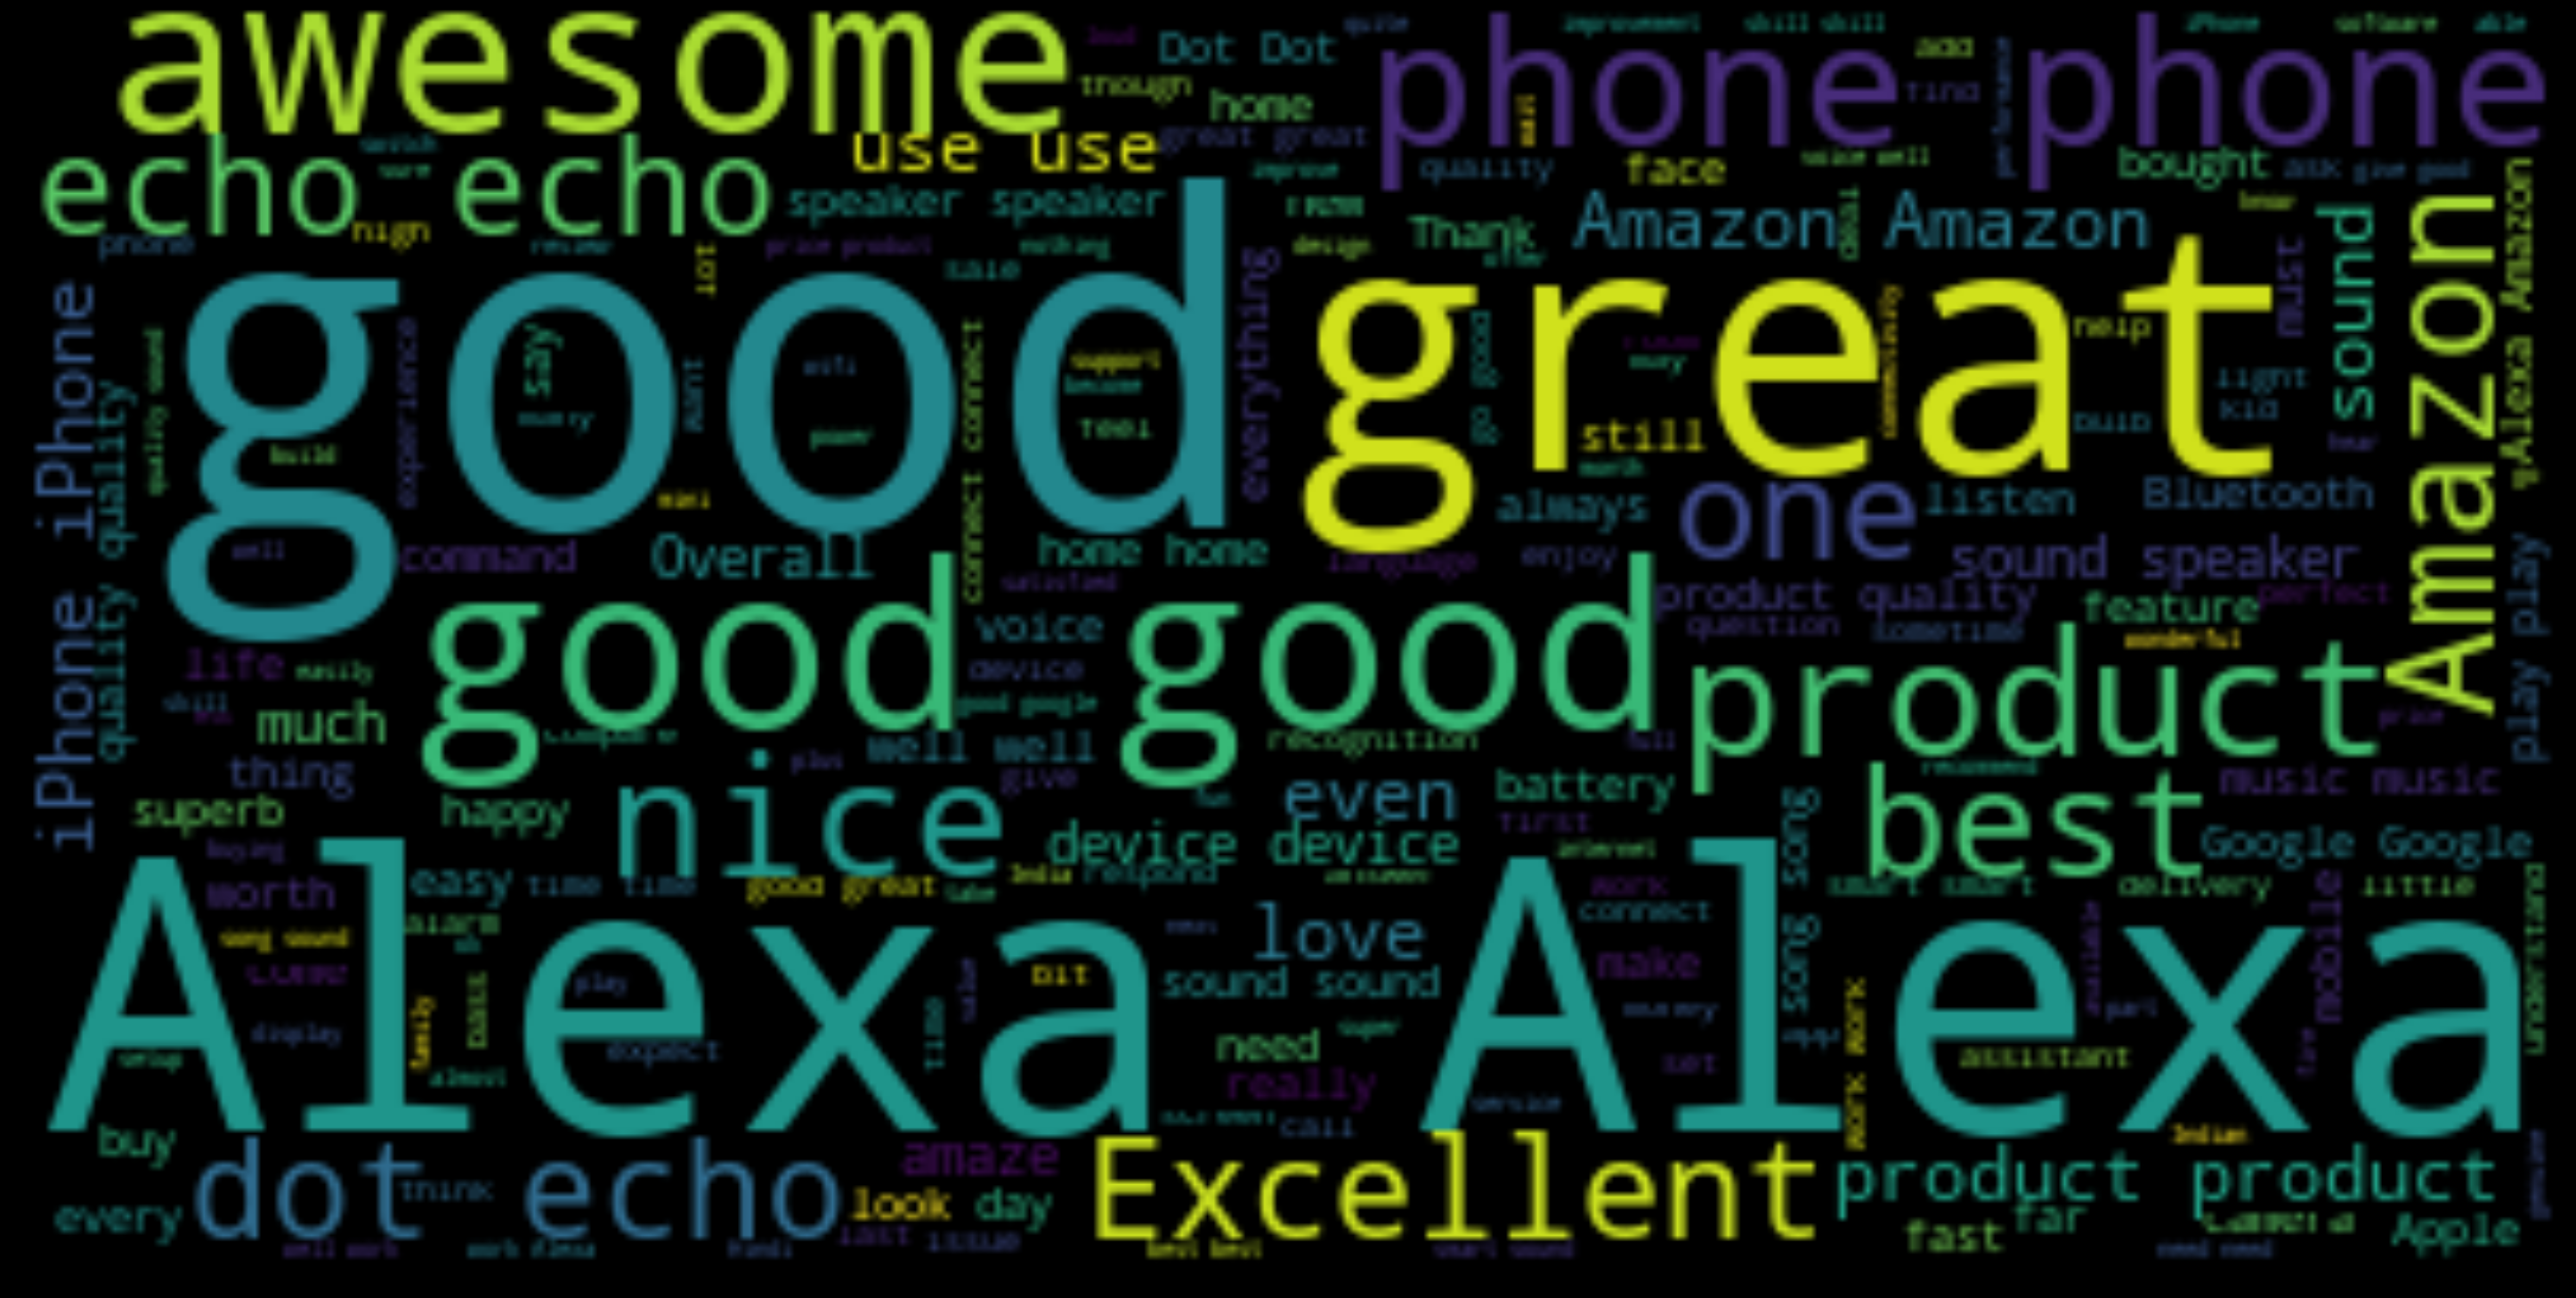

In [47]:
wordcloud3 = WordCloud().generate(' '.join(df_positive['liststring']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud3, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [48]:
df_negative = df[df['Rating'] == 'Negative']
df_negative.head()

comment  \
6                                                                                                                                                                                                     Got a defected piece   camera and face id was not working   phone is sent to bangalore service centre now   will receive it after 4 5 days   Not a happy experience till now \n               
9                                                                                                   The phone screen and back panel is highly fragile for such an expensive phone  My phone back panel got broken within a month with a very low drop  The fun part is  the authorized service center says the back panel cannot be replaced and only option is to get a new phone \n               
22      Purchase this product on December 27 but they delayed by 3 days    Because of that I was asked to do pick up from the Amazon warehouse   After using the product for 1 and half months   The battery life is really bad    I must say worst    the battery will drain within 5 hrs    And if you play like pubg mobile   the phone get heat  within 10 minutes of playing  \n               
34                                                                                                                                                                 I had a worst experience in purchasing Iphone X  Iphone never switched on after unboxing  After talking to amazon executive I had to submit phone to apple service centre  Amazon disnot even replaced my phone \n               
36  I ordered new iPhone X grey on Amazon sale  Phone looks absolutely fine but battery is very weak though it has fast charging option my phone requires 4 5 hours to get charged completely n also my phone is very slow   feels like I have got a refurbished phone  Guys plz never go for online when u r purchasing costly phones  I have done a mistake u think before doing \n               

                 stars                  titleheading  \
6   2.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
9   1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
22  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
34  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
36  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                           comment1  \
6                                                                                                                                                                                      [Got, bangalore, camera, centre, day, defect, experience, face, happy, id, phone, piece, receive, sent, service, till, work]   
9                                                                                             [authorize, back, back, back, broken, center, drop, expensive, fragile, fun, get, get, highly, low, month, new, option, panel, panel, panel, part, phone, phone, phone, phone, replace, say, screen, service, within]   
22                                                                         [Amazon, December, Purchase, ask, bad, bad, battery, battery, day, delayed, drain, get, half, heat, hr, life, like, minute, mobile, month, must, phone, pick, play, product, product, pubg, really, say, use, warehouse, within, within]   
34                                                                                                                                        [Amazon, Iphone, Iphone, amazon, apple, bad, centre, disnot, even, executive, experience, never, phone, phone, purchasing, replace, service, submit, switch, talk, unbox]   
36  [Amazon, Guys, Phone, X, absolutely, also, battery, charge, charge, completely, costly, do, fast, feel, fine, get, get, go, grey, hour, iPhone, lik

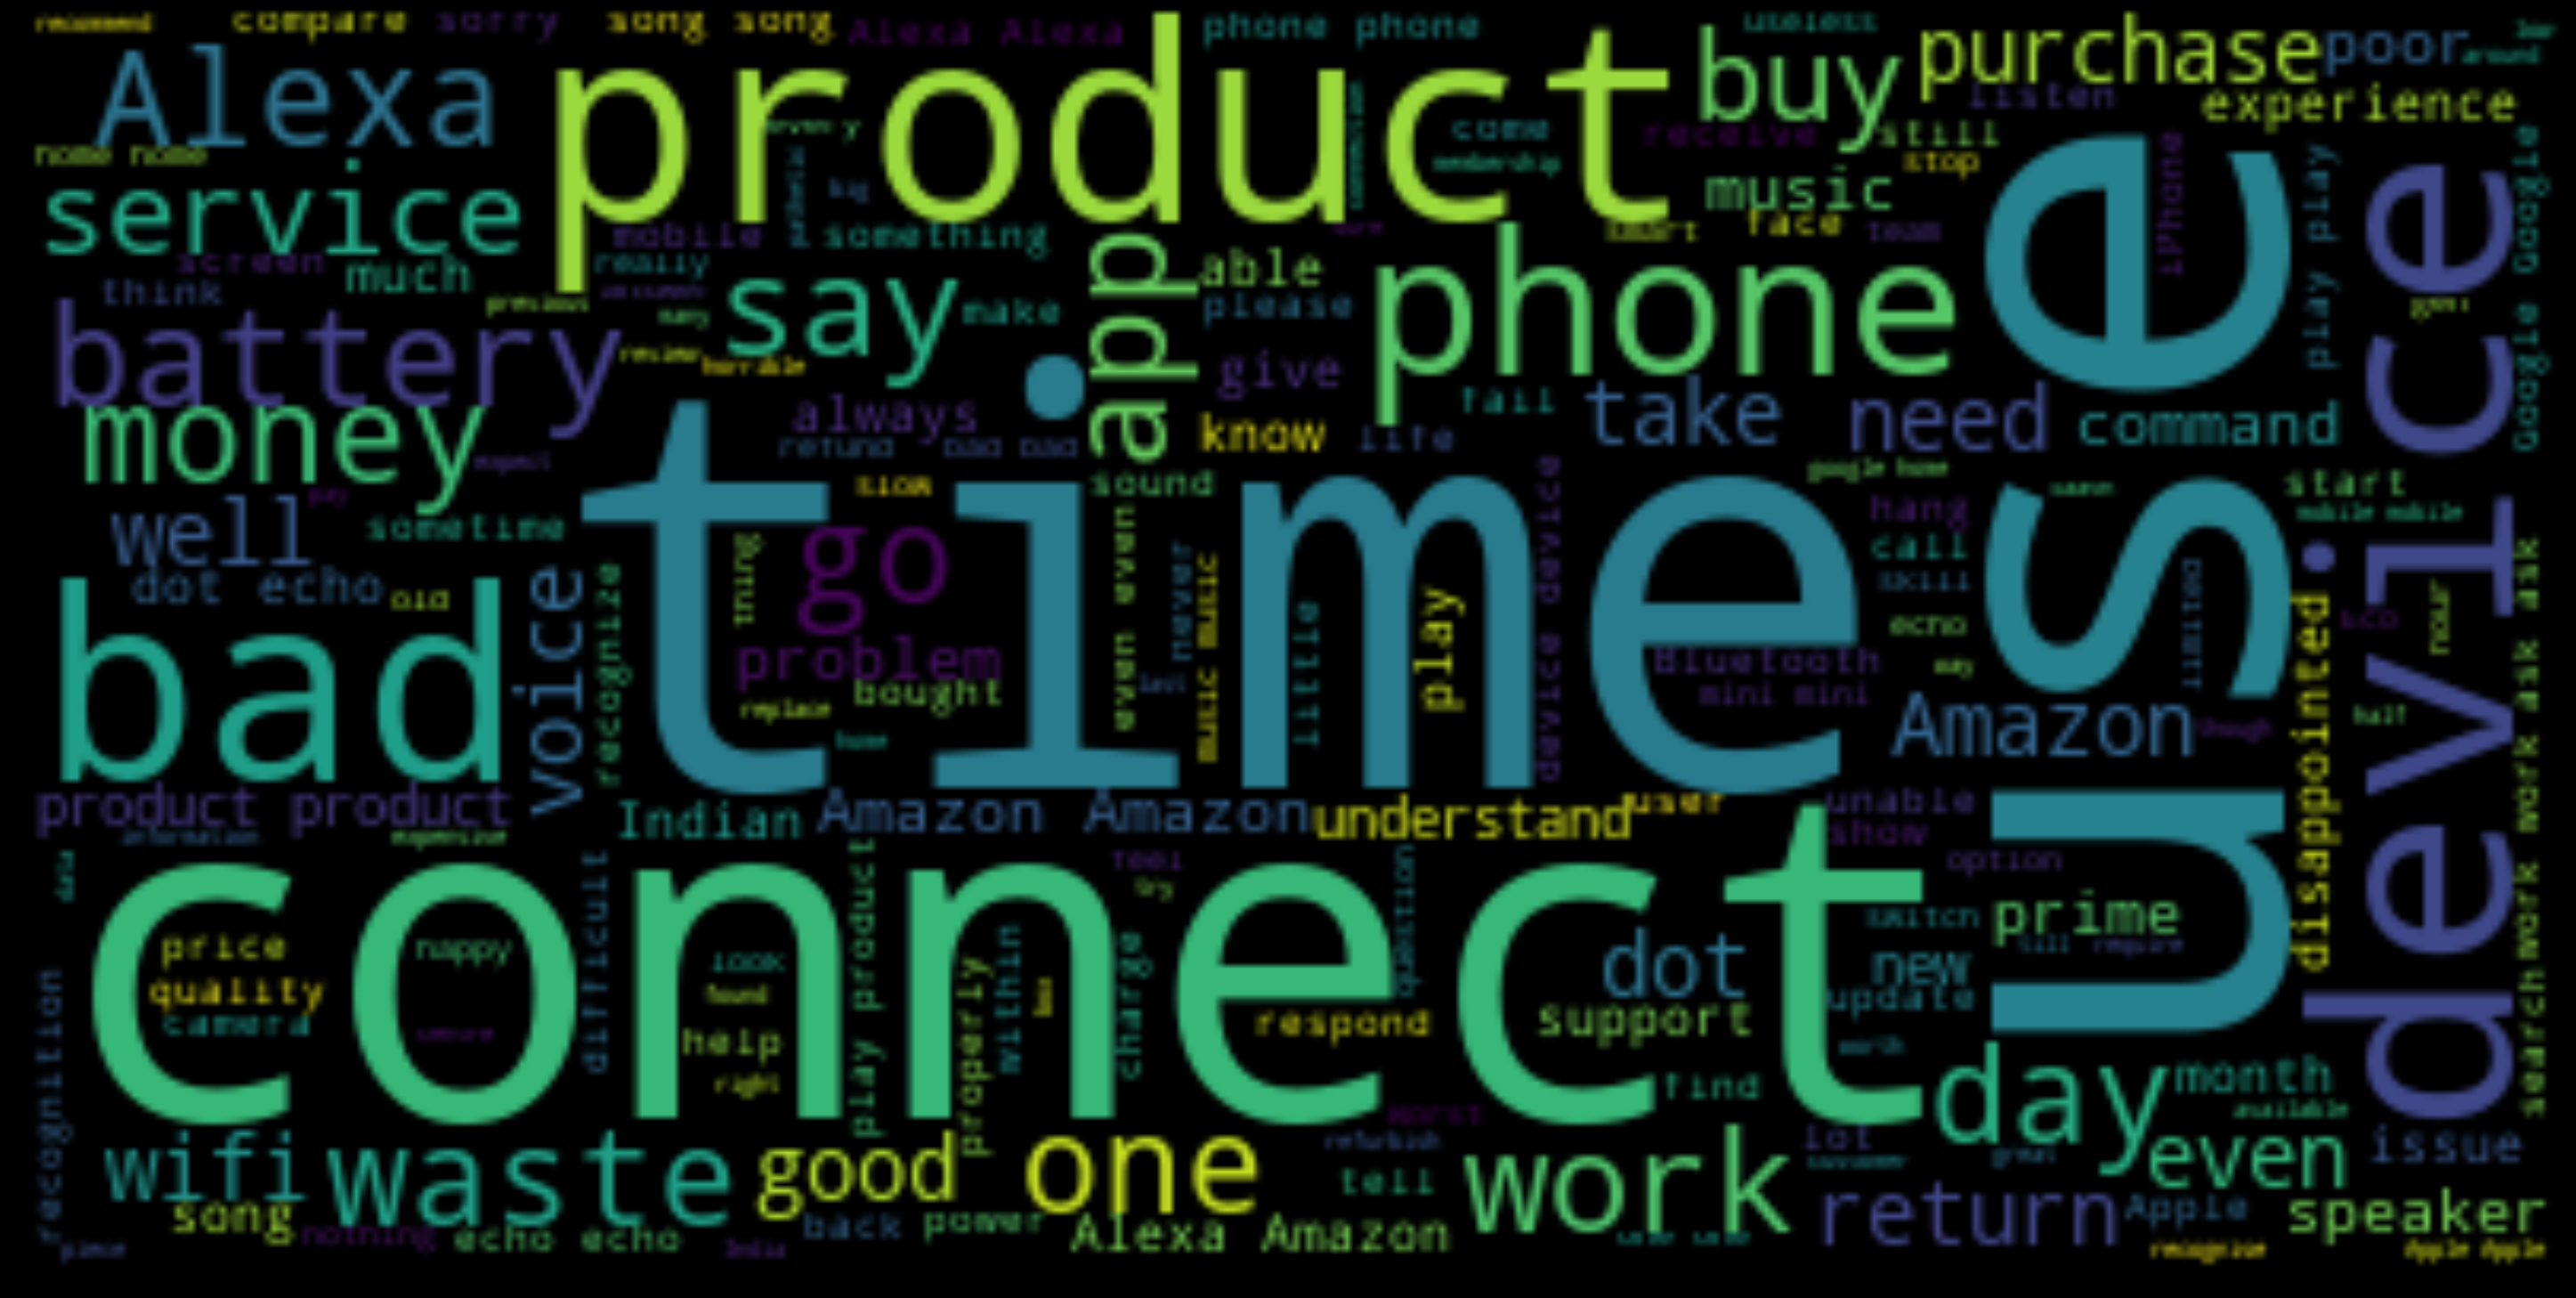

In [49]:
wordcloud4 = WordCloud().generate(' '.join(df_negative['liststring']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud4, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [50]:
df_neutral = df[df['Rating'] == 'Neutral']
df_neutral.head()

comment  \
60                                                                                                                                       Ear phone got off can talk only through speaker\n               
61                                                                                                             Touch not working properly  Apple care says talk to amazon  No resolution\n               
66                                                 When I unboxed it I saw photo gallery n there were some pics already taken one year ago  means phone was already unboxed one year ago\n               
87                                                                                                                                                                            Got at 68k\n               
105  ConsCall recording option is absent hangs at times Sharing provisions are less ProsCamera is awesomeOverall purchase is good This is my personal experience after usage of a month \n               

                  stars                  titleheading  \
60   1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
61   1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
66   3.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
87   5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
105  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                             comment1  \
60                                                                                                   [Ear, get, phone, speaker, talk]   
61                                                                [Apple, Touch, amazon, care, properly, resolution, say, talk, work]   
66                          [ago, already, already, gallery, n, one, one, phone, photo, pic, saw, take, unboxed, unboxed, year, year]   
87                                                                                                                              [Got]   
105  [ConsCall, Sharing, absent, awesomeOverall, experience, hang, month, option, personal, provision, purchase, record, time, usage]   

     polarity  subjectivity   Rating  \
60        0.0           1.0  Neutral   
61        0.0           0.1  Neutral   
66        0.0           0.0  Neutral   
87        0.0           0.0  Neutral   
105       0.0           0.3  Neutral   

                                                                                                            liststring  
60                                                                                          Ear,get,phone,speaker,talk  
61                                                           Apple,Touch,amazon,care,properly,resolution,say,talk,work  
66                            ago,already,already,gallery,n,one,one,phone,photo,pic,saw,take,unboxed,unboxed,year,year  
87                                                                                                                 Got  
105  ConsCall,Sharing,absent,awesomeOverall,experience,hang,month,option,personal,provision,purchase,record,time,usage

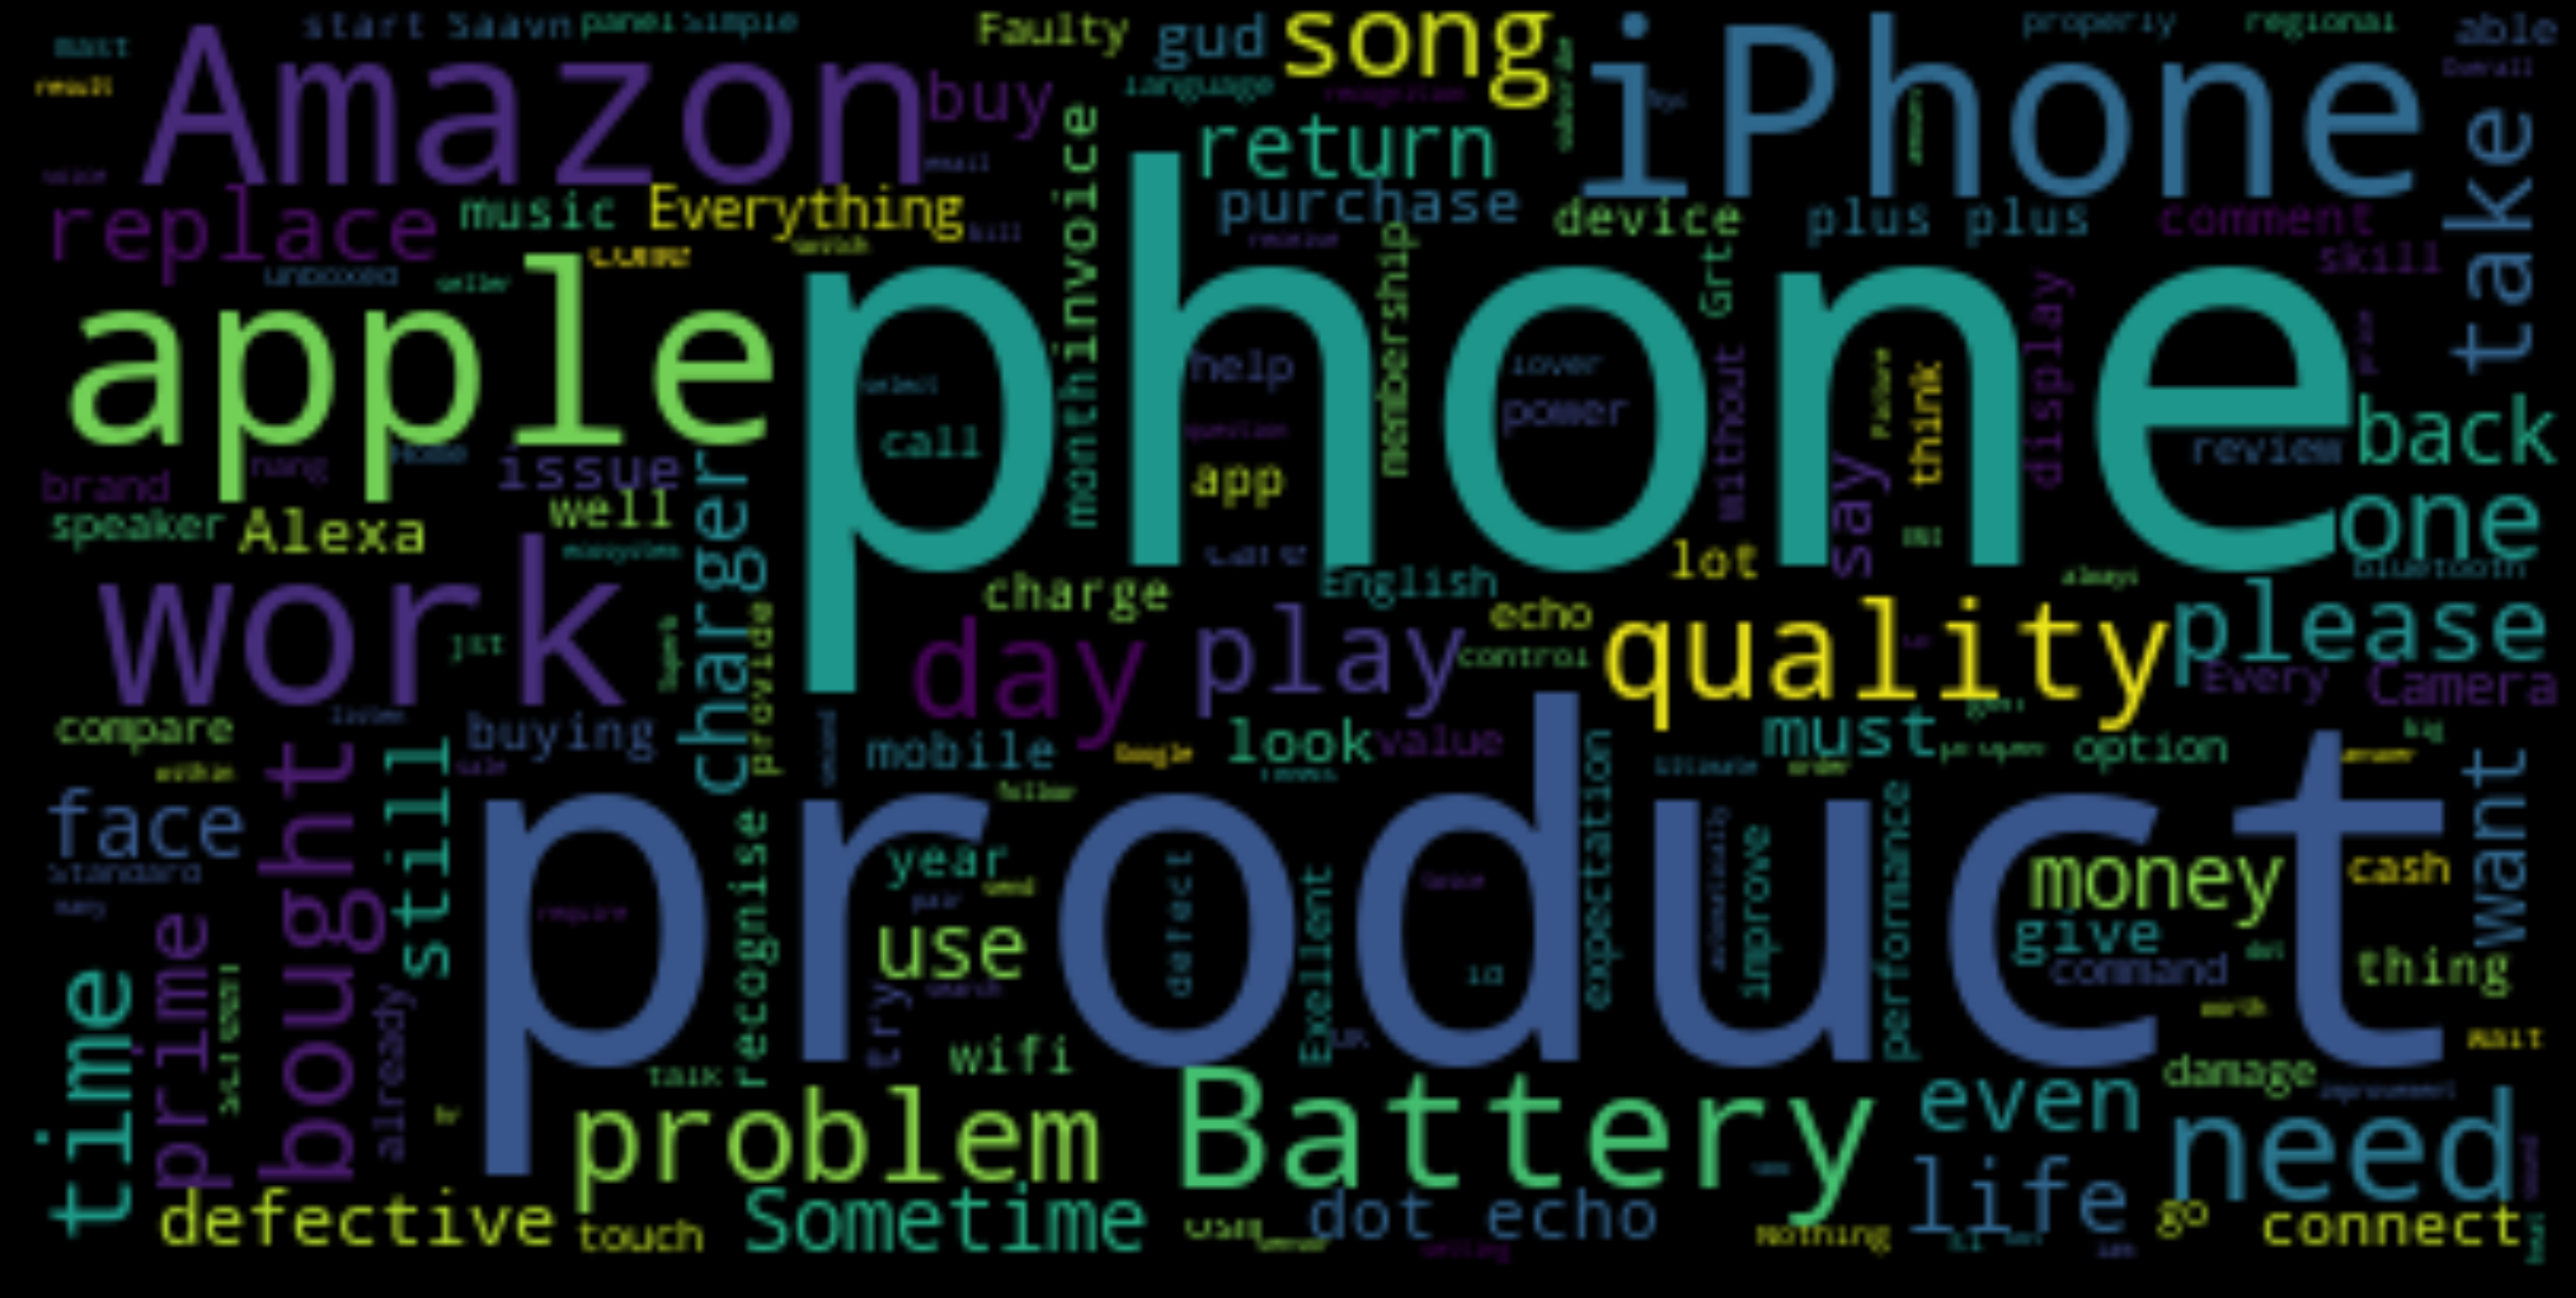

In [51]:
wordcloud5 = WordCloud().generate(' '.join(df_neutral['liststring']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud5, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [52]:
del df['liststring']
df.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          awesome product i am using right now and iphone no hanging  or lagging issues\n               
1  When you say its  Apple I Phone  it is the most coveted phones available in the market Every time Apple release s a new phone there is a lot of buzz around the phone  but honestly speaking it stands up to all the hype and expectation created around it Was earlier using I phone 6 now decided to upgrade my self to I Phone X  the delivery of ordered product was much faster then expected  Thanks Amazon  The minute you hold the phone in your hand it feels so Premium  the build quality is Excellen...   
2  iPhone X is like no other phone out there  Is a manifesto go to phone for premiumness  Class apart in a nutshell The security of iPhone is amazing as always The camera is top notch and portrait mode is the best any camera offers There are so many inbuilt AR apps which take the game to the outer space  The battery life is quite good as well  With heavy use it’s been able to last more than 12 14 hours No heating issues Supports siri and amazon alexa as well out of the box Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online  Now its been almost 1 month that i am using this  thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust  and trust me its worth every penny  I got an authentic product with earphones  charger and a connector  you can check it as well on imei24 and official apple website  It feels so premium in hands and very handy as ...   
4                                                                   Found the perfect deal during the Great Indian Festival  I thought the deal was too good to be true and was expecting a cancellation of order from the seller  But the day I received the order was epic  The phone is simply superb  Everything about the phone is perfect    hey what do expect from an Apple product  Good battery life  durable with screen protector and case and screen quality is excellent  Thank you Amazon\n               

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, hang, iphone, issue, lag, product, right, use]   
1  [Apple, Apple, Apple, Back, Charging, Clarity, Crisp, Excellent, HD, Iphone, Jarring, Packaging, Phone, Phone, P

In [53]:
df['titleheading'].unique()

array(['Apple-iPhone-64GB-Space-Grey', 'Echo-Dot-3rd-Gen-improved'],
      dtype=object)

In [54]:
def brand(row):
    #row="G-Shock Men's Grey Sport Watch"
    brand = []
    row1=''.join(re.findall(r'[a-zA-Z]', row) )
    row1=row1.lower()
    if "apple" in row1:
        brand.append("iphone")
    elif "echo" in row1:
        brand.append("amazon")
    return "".join(brand)

In [55]:
df_brand = df
df_multi =df 

In [56]:
df_brand['titleheading'] = df_brand['titleheading'].astype(str)
df_brand['Brand']=df_brand['titleheading'].apply(brand)

In [57]:
df_brand= df_brand[df_brand['Brand']!='']
df_brand.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          awesome product i am using right now and iphone no hanging  or lagging issues\n               
1  When you say its  Apple I Phone  it is the most coveted phones available in the market Every time Apple release s a new phone there is a lot of buzz around the phone  but honestly speaking it stands up to all the hype and expectation created around it Was earlier using I phone 6 now decided to upgrade my self to I Phone X  the delivery of ordered product was much faster then expected  Thanks Amazon  The minute you hold the phone in your hand it feels so Premium  the build quality is Excellen...   
2  iPhone X is like no other phone out there  Is a manifesto go to phone for premiumness  Class apart in a nutshell The security of iPhone is amazing as always The camera is top notch and portrait mode is the best any camera offers There are so many inbuilt AR apps which take the game to the outer space  The battery life is quite good as well  With heavy use it’s been able to last more than 12 14 hours No heating issues Supports siri and amazon alexa as well out of the box Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online  Now its been almost 1 month that i am using this  thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust  and trust me its worth every penny  I got an authentic product with earphones  charger and a connector  you can check it as well on imei24 and official apple website  It feels so premium in hands and very handy as ...   
4                                                                   Found the perfect deal during the Great Indian Festival  I thought the deal was too good to be true and was expecting a cancellation of order from the seller  But the day I received the order was epic  The phone is simply superb  Everything about the phone is perfect    hey what do expect from an Apple product  Good battery life  durable with screen protector and case and screen quality is excellent  Thank you Amazon\n               

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, hang, iphone, issue, lag, product, right, use]   
1  [Apple, Apple, Apple, Back, Charging, Clarity, Crisp, Excellent, HD, Iphone, Jarring, Packaging, Phone, Phone, P

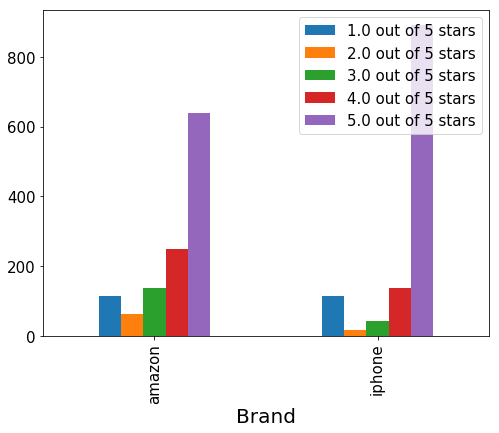

In [58]:
amazon_review = df_multi.groupby(['Brand','stars']).stars.count().unstack()


plot = amazon_review.plot(kind='bar')
plot.set_xlabel('Brand', fontsize=20)
plot.set_ylabel("",fontsize=15)
#plot_size[0] = 10
#plot_size[1] = 10
#plt.rcParams["figure.figsize"] = plot_size

plot.tick_params(axis="x", labelsize=15)
plot.tick_params(axis="y", labelsize=15)
plot.legend(fontsize=15)

In [59]:
#plot for one brand 
#change brand name in function in order to get that particular brand
def onebrand(row):
    #row="G-Shock Men's Grey Sport Watch"
    brand = []
    row1=''.join(re.findall(r'[a-zA-Z]', row) )
    row1=row1.lower()
    if "apple" in row1:
        brand.append("iphone")
        return "".join(brand)

In [60]:
df_brand['titleheading'] = df_brand['titleheading'].astype(str)
df_brand['Brand']=df_brand['titleheading'].apply(onebrand)
df_brand = df_brand[df_brand['Brand']!='']

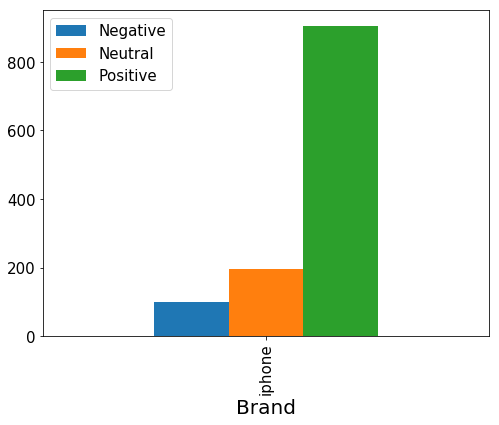

In [61]:
amazon_review = df_brand.groupby(['Brand','Rating']).Rating.count().unstack()


plot = amazon_review.plot(kind='bar')
plot.set_xlabel('Brand', fontsize=20)
plot.set_ylabel("",fontsize=15)
#plot_size[0] = 10
#plot_size[1] = 10
#plt.rcParams["figure.figsize"] = plot_size

plot.tick_params(axis="x", labelsize=15)
plot.tick_params(axis="y", labelsize=15)
plot.legend(fontsize=15)

In [62]:
df.head()

comment  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          awesome product i am using right now and iphone no hanging  or lagging issues\n               
1  When you say its  Apple I Phone  it is the most coveted phones available in the market Every time Apple release s a new phone there is a lot of buzz around the phone  but honestly speaking it stands up to all the hype and expectation created around it Was earlier using I phone 6 now decided to upgrade my self to I Phone X  the delivery of ordered product was much faster then expected  Thanks Amazon  The minute you hold the phone in your hand it feels so Premium  the build quality is Excellen...   
2  iPhone X is like no other phone out there  Is a manifesto go to phone for premiumness  Class apart in a nutshell The security of iPhone is amazing as always The camera is top notch and portrait mode is the best any camera offers There are so many inbuilt AR apps which take the game to the outer space  The battery life is quite good as well  With heavy use it’s been able to last more than 12 14 hours No heating issues Supports siri and amazon alexa as well out of the box Though it is a very s...   
3  My first ever iphone and this much expensive purchase from Amazon and i was literally doubtful if i should purchase this online  Now its been almost 1 month that i am using this  thanks amazon for the wonderful delivery and the seller Appario retail pvt ltd for building the trust  and trust me its worth every penny  I got an authentic product with earphones  charger and a connector  you can check it as well on imei24 and official apple website  It feels so premium in hands and very handy as ...   
4                                                                   Found the perfect deal during the Great Indian Festival  I thought the deal was too good to be true and was expecting a cancellation of order from the seller  But the day I received the order was epic  The phone is simply superb  Everything about the phone is perfect    hey what do expect from an Apple product  Good battery life  durable with screen protector and case and screen quality is excellent  Thank you Amazon\n               

                stars                  titleheading  \
0  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
1  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
2  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
3  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
4  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              comment1  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                             [awesome, hang, iphone, issue, lag, product, right, use]   
1  [Apple, Apple, Apple, Back, Charging, Clarity, Crisp, Excellent, HD, Iphone, Jarring, Packaging, Phone, Phone, P

In [65]:
test = df.loc[df.groupby('Rating').polarity.idxmin()]
test = test[test.Rating == "Negative"]
test

comment  \
34  I had a worst experience in purchasing Iphone X  Iphone never switched on after unboxing  After talking to amazon executive I had to submit phone to apple service centre  Amazon disnot even replaced my phone \n               

                 stars                  titleheading  \
34  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                                                                                                                                                                     comment1  \
34  [Amazon, Iphone, Iphone, amazon, apple, bad, centre, disnot, even, executive, experience, never, phone, phone, purchasing, replace, service, submit, switch, talk, unbox]   

    polarity  subjectivity    Rating   Brand  
34      -1.0           1.0  Negative  iphone

In [66]:
test1 = df.loc[df.groupby('Rating').polarity.idxmax()]
test1 = test1[test1.Rating == "Positive"]
test1

comment  \
60                                                                                                            There is nothing to dislike in 3 generation Echo Dot   Everything about it is made to Perfection  The sound output is just splendid and I own Echo Plus and Echo Dot 2 generation  I regret to have bought the 2 generation Dot since the audio output is pathetic and needs a Bose Bluetooth speaker to do justice but in the case of Dot 3 generation the gadget delivers      Go for it \n               
70                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Everything perfect \n               
70  I bought it from amazon great Indian sale for Rs 3000 and am totally happy with the device • Sound quality more then what I expected • Very good hardware • Full premium look and feel • 4 microphones don t fail you even in considerable noise around • Lots of things to say to Alexa and you can add more skills using amazon echo application • good bass • You can even customize a few things like you can make the device listen to you by saying Computer or Echo instead of Alexa •Even better if you ...   

                 stars                  titleheading  \
60  4.0 out of 5 stars     Echo-Dot-3rd-Gen-improved   
70  5.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   
70  5.0 out of 5 stars     Echo-Dot-3rd-Gen-improved   

                                                                                                                                                                                                                                                                                                                                                                                        comment1  \
60                                                                                                    [Bluetooth, Bose, Dot, Dot, Dot, Dot, Echo, Echo, Echo, Everything, Go, Perfection, Plus, audio, bought, case, delivers, dislike, gadget, generation, generation, generation, generation, justice, make, need, nothing, output, output, pathetic, regret, since, sound, speaker, splendid]   
70                                                                                                                                                                                                                                                                                                                                                                         [Everything, perfect]   
70  [Alexa, Amazon, Computer, Echo, Full, Indian, Lots, Prime, Sound, Supports, add, amazon, amazon, another, audio, bluetooth, bought, buy, considerable, customize, device, echo, even, even, fail, good, good, great, happy, instead, like, listen, look, make, microphone, noise, one, planning, premium, product, quality, regret, sale, say, say, skill, thing, thing, totally, use, well]   

    polarity  subjectivity    Rating   Brand  
60  0.208333      0.850000  Positive  amazon  
70  1.000000      1.000000  Positive  iphone  
70  0.405000      0.535833  Positive  amazon

In [67]:
test2 = df.loc[df.groupby('Rating').polarity.idxmax()]
test2 = test2[test2.Rating == "Neutral"]
test2

comment  \
60  Ear phone got off can talk only through speaker\n               

                 stars                  titleheading  \
60  1.0 out of 5 stars  Apple-iPhone-64GB-Space-Grey   

                            comment1  polarity  subjectivity   Rating   Brand  
60  [Ear, get, phone, speaker, talk]       0.0           1.0  Neutral  iphone